<a href="https://colab.research.google.com/github/gimenopea/CSCI6364/blob/main/PCA%2C%20KNN%2C%20RF%20-%20Project%203/6364_Project_3_Part_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook and code Repository Reference:
https://www.kaggle.com/code/sflender/comparing-random-forest-pca-and-knn/notebook

In this analysis, i will use two methods of MNIST classification which tries to classify handwritten digits through vectorized images. In particular, i will be using 2 approaches:
1. Random Forest approach
2. Dimensionality Reduction via PCA and KNN

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set_style("dark")
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf', 'indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
# read in the data

train = pd.read_csv('/content/drive/MyDrive/DATA_STORE/6364Proj3/mnist_train.csv')
test  = pd.read_csv('/content/drive/MyDrive/DATA_STORE/6364Proj3/mnist_test.csv')
target = train["label"]
train = train.drop("label",1)

#train test split train data
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


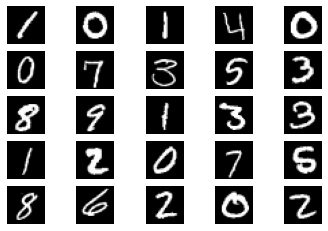

In [ ]:
#plot of a sample of data

fig, ax = plt.subplots(5,5)
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(train.iloc[i*5+j].values.reshape(28,28), cmap='gray')
        ax[i,j].axis('off')


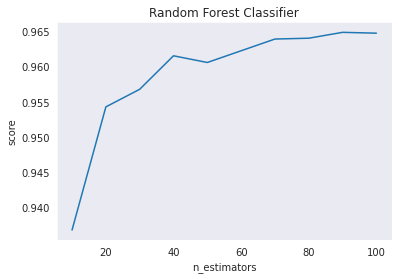

In [ ]:
#performance of random forest classifier and finding the best number of estimators based on the score

n_estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
scores = []
for n in n_estimators:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.title('Random Forest Classifier')
plt.show()

from this estimator search, we hit a plateu on n = 50 estimators

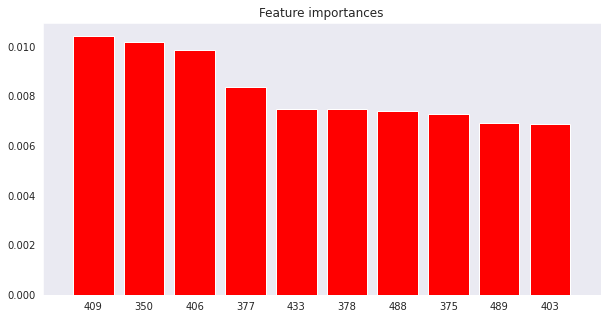

In [ ]:
#rank features based on importance and plot the top 10

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]], color="r", align="center")
plt.xticks(range(10), indices[:10])
plt.xlim([-1, 10])
plt.show()


In [ ]:
#final random forest score for 50 estimators
print(clf.score(X_test, y_test))

0.9621428571428572


### Using PCA for dimensionality reduction and KNN to classify mnist labels

In [ ]:
#use pca to reduce the dimensionality of the data using an array of components

n_components = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
scores = []

for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    #use knn classifier
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train_pca, y_train)
    scores.append(clf.score(X_test_pca, y_test))



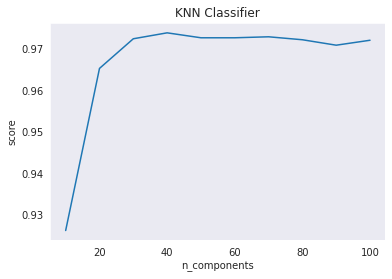

In [ ]:
#plot the scores for each number of components
plt.plot(n_components, scores)
plt.xlabel('n_components')
plt.ylabel('score')
plt.title('KNN Classifier')
plt.show()


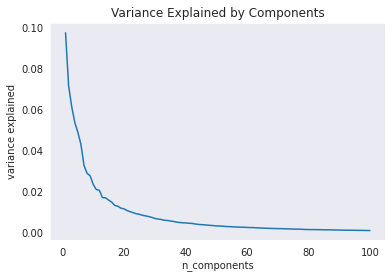

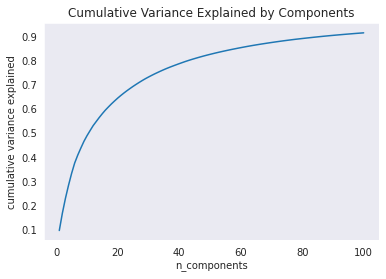

In [ ]:
#plot the variance explained by components

pca = PCA(n_components=100)
pca.fit(train)
plt.plot(range(1,101), pca.explained_variance_ratio_)
plt.xlabel('n_components')
plt.ylabel('variance explained')
plt.title('Variance Explained by Components')
plt.show()

#plot the cumulative variance explained by components

pca = PCA(n_components=100)
pca.fit(train)
plt.plot(range(1,101), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n_components')
plt.ylabel('cumulative variance explained')
plt.title('Cumulative Variance Explained by Components')
plt.show()

it is observed that roughly 80 percent of the variance is observed for n = 50 principal components, therefore we'll use this in training a KNN classifier

In [ ]:
#train using PCA and knn where pca components = 50

pca = PCA(n_components=50)
pca.fit(train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_pca, y_train)
print(clf.score(X_test_pca, y_test))


0.9729761904761904


This is a slight improvement from the RandomForest Classifier at 50 estimators. Accuracy score provided by the RF classifier is .96 while the PCA + KNN approach provided an accuracy of .97 - a slight improvement!